MovieLens Data Analysis
================================================================================

#### **INTRODUCTION**

In this project, I would like to analyse the Movielens 1M dataset. I have downloaded the 1 million ratings data set from http://grouplens.org/datasets/movielens/. 

**RATINGS FILE DESCRIPTION**

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

**USERS FILE DESCRIPTION**

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

**MOVIES FILE DESCRIPTION**

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

#### **DATA ANALYSIS**

Let's start with importing the libraries and reading the data. I will extract the years from the title name and re-organize the data set to merge them all in one data set.

In [1]:
# First we import necessary Libaries
import pandas as pd # pandas for a data analysis
import numpy as np #numpy for numerical analysis
import matplotlib.pyplot as plt # matplotlib for data visualization
import seaborn as sns #Seaborn for heatmap

In [2]:
# For Users
usernames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/users.dat', sep='::', header=None, names=usernames, engine='python')
# For Ratings
ratingnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ratings.dat', sep='::', header=None, names=ratingnames, engine='python')
# For Movies
moviesnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movies.dat', sep='::', header=None, names=moviesnames, engine='python', encoding = "latin")

In [3]:
# To see what we have in data
for df in [users,ratings,movies]:
    print(df.head())
    print("-----------------------------------------")

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
-----------------------------------------
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
-----------------------------------------
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride P

In [4]:
#Let's substract the title from our movies data
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [5]:
# Merge the data
data = pd.merge(pd.merge(ratings, users), movies)

In [6]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,1998
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,1999
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,1973


Now we have a nicely merged one data set. Let's start with analyzing the number of movies released by years.

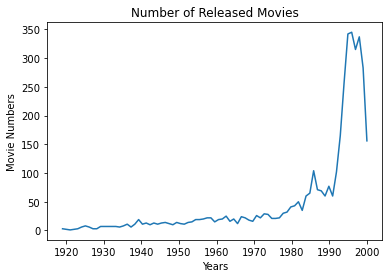

Maximum Number of Movies = 345 in 1996


count     81.000000
mean      47.938272
std       81.786360
min        1.000000
25%       11.000000
50%       19.000000
75%       35.000000
max      345.000000
Name: title, dtype: float64

In [7]:
numofmovies = movies.groupby('Year').title.count()
yearss = np.linspace(1919,2000,81)
plt.plot(yearss,numofmovies)
plt.title("Number of Released Movies")
plt.xlabel("Years")
plt.ylabel("Movie Numbers")
plt.show()
for i in numofmovies.index:
    if numofmovies[i] == numofmovies.max():
        print('Maximum Number of Movies =',numofmovies.max(),'in', i)
numofmovies .describe()

We can see that number of released movies increased each years. The maximum number of movies is 345 in 1996. 

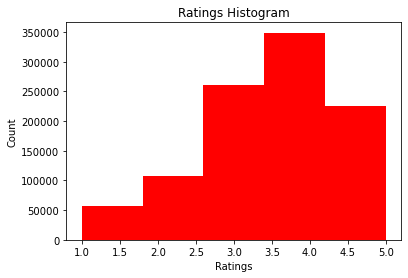

Number of users 6040


In [8]:
Rating=data["rating"]
plt.title("Ratings Histogram")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.hist(Rating,histtype='bar',rwidth=10,color='red',label='Ratings',bins=5)
plt.show()
Rating.describe()
print('Number of users', len(data['user_id'].value_counts()))

The rating system is between 1 Star to 5 Stars. 1 M rates are given by 6040 users for 4000 movies. Mean value of the ratings is 3.58. Now, I would like to see which genres are most and least popular. Then, I will investigate the average ratings of the genres to figure it out which genres are most liked and which ones are most hated. 

In [9]:
# The code below caunts the number of ratings and sort them
Genre =data.groupby(by='genres').count().reset_index()
result = Genre.sort_values(by="rating", ascending=False)
topgenre= result.iloc[0:10, :]
genr=topgenre["genres"]
df2=pd.DataFrame(genr)
rating1=topgenre["rating"]
df3=pd.DataFrame(rating1)
df4=df2.join(df3)
df4

,genres,rating
176,Comedy,116883
239,Drama,111423
207,Comedy|Romance,42712
185,Comedy|Drama,42245
252,Drama|Romance,29170
92,Action|Thriller,26759
274,Horror,22563
260,Drama|Thriller,18248
298,Thriller,17851
33,Action|Adventure|Sci-Fi,17783


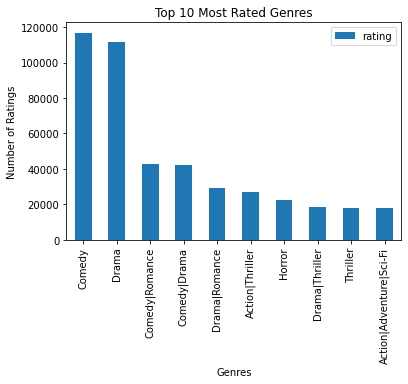

In [10]:
ax=df4.plot(kind="bar",x="genres",y="rating")
ax.set_ylabel("Number of Ratings")
ax.set_xlabel("Genres")
ax.set_title("Top 10 Most Rated Genres")
plt.show()

Top 10 genre listed above. As we can see, most popular genres are comedy and dramas. Now, let's check which genres are the most liked.

In [11]:
averageRatings=data.groupby(by='genres').mean().reset_index()
highestAverageRatings=averageRatings.sort_values(by="rating",ascending=False)
genreDf=pd.DataFrame(highestAverageRatings["genres"])
ratingDf=pd.DataFrame(highestAverageRatings["rating"])
sortedhighestavg=genreDf.join(ratingDf)
sortedhighestavg.head(10)

,genres,rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107
270,Film-Noir|Romance|Thriller,4.294382
21,Action|Adventure|Drama|Sci-Fi|War,4.292977
271,Film-Noir|Sci-Fi,4.273333
226,Crime|Film-Noir,4.264129
266,Film-Noir,4.258105


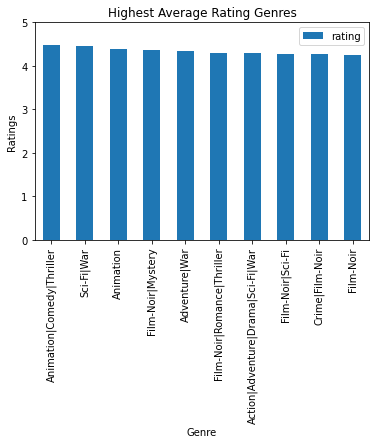

In [12]:
ax1=sortedhighestavg.head(10).plot(kind="bar",x="genres",y="rating",ylim=(0,5))
ax1.set_title("Highest Average Rating Genres")
ax1.set_ylabel("Ratings")
ax1.set_xlabel("Genre")
plt.show()

The 10 most liked genres are listed above. We can say that people prefer to like the movies that excites them.

In [13]:
lowestAverageRatings=averageRatings.sort_values(by="rating",ascending=True)
lowGenreDf=pd.DataFrame(lowestAverageRatings["genres"])
lowRatingDf=pd.DataFrame(lowestAverageRatings["rating"])
sortedlowestavg=lowGenreDf.join(lowRatingDf)
sortedlowestavg.head(10)

,genres,rating
5,Action|Adventure|Children's,1.318182
41,Action|Children's,1.742373
8,Action|Adventure|Children's|Sci-Fi,1.874286
195,Comedy|Film-Noir|Thriller,2.000000
7,Action|Adventure|Children's|Fantasy,2.090909
91,Action|Sci-Fi|Western,2.158537
28,Action|Adventure|Mystery|Sci-Fi,2.238938
15,Action|Adventure|Comedy|War,2.276995
6,Action|Adventure|Children's|Comedy,2.306950
42,Action|Children's|Fantasy,2.389517


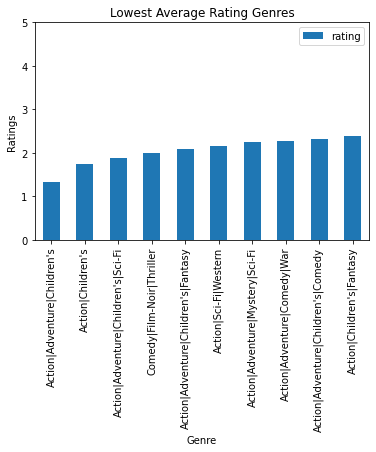

In [14]:
ax2=sortedlowestavg.head(10).plot(kind="bar",x="genres",y="rating",ylim=(0,5))
ax2.set_title("Lowest Average Rating Genres")
ax2.set_ylabel("Ratings")
ax2.set_xlabel("Genre")
plt.show()

The most hated movie genres are shown above. We can see that children movies are the most distasteful movies. Now let's analyze our data on the gender bases.

In [15]:
# Number of genders
data['gender'].value_counts()

M    753769
F    246440
Name: gender, dtype: int64

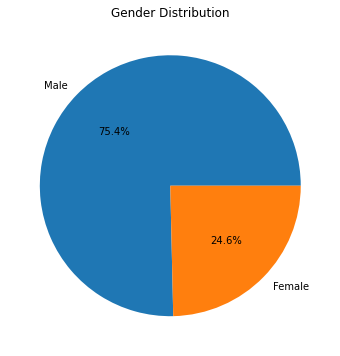

In [16]:
# Visual representation
y = np.array([753769, 246440])
mylabels = ["Male", "Female"]
plt.figure(facecolor='white',figsize=(6,6))
plt.pie(y, labels=mylabels, autopct='%.1f%%')
plt.title("Gender Distribution")
plt.show() 

The %75 of the ratings are belong to the male while only the %25 is belong to the female. Lets create mean ratings based on genders. That creates some sort of bias on data since most liked movies and genres are manipulated by male rating. I will create a pivot table to analyze the gender based ratings.

In [17]:
# Create a pivot table
mean_ratings_genres = data.pivot_table(values='rating', index='genres',columns='gender', aggfunc='mean')
mean_ratings_genres

gender,F,M
genres,,
Action,3.367474,3.352991
Action|Adventure,3.701213,3.671115
Action|Adventure|Animation,3.843750,4.217082
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071
...,...,...
Sci-Fi|Thriller|War,3.450000,3.437500
Sci-Fi|War,4.376623,4.464789
Thriller,3.563776,3.553364


In [18]:
top_female_genres = mean_ratings_genres.sort_values(by="F",ascending=False)
top_female_genres.head(10)

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138
Film-Noir,4.339806,4.229866
Action|Adventure|Romance|War,4.324232,4.223822
Film-Noir|Mystery,4.319444,4.381536
Comedy|Mystery|Romance|Thriller,4.308901,4.108280


In [19]:
top_male_genres = mean_ratings_genres.sort_values(by="M",ascending=False)
top_male_genres.head(10)

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107
Action|Adventure|Drama|Sci-Fi|War,4.106481,4.344577
Crime|Film-Noir,4.103286,4.316514
Film-Noir|Sci-Fi,4.086538,4.312500
Drama|Film-Noir,4.140351,4.235409


While the top 3 genres like by male users are Sci-Fi|War, Animation|Comedy|Thriller, Film-Noir|Mystery, for female users it is Animation|Comedy|Thriller, Animation, Film-Noir|Romance|Thriller.

In [20]:
# To calculate the correlation coefficient
def var(x1):
    "Calculates the variance"
    return np.mean(((x1)-np.mean(x1))**2)
def corr(x1,x2):
    "Calculates the correlation coefficient between two variables"
    return (np.mean((x1-np.mean(x1))*(x2-np.mean(x2))))/((np.sqrt(var(x1)))*(np.sqrt(var(x2))))

Correlation Coefficient =  0.9012097743394248


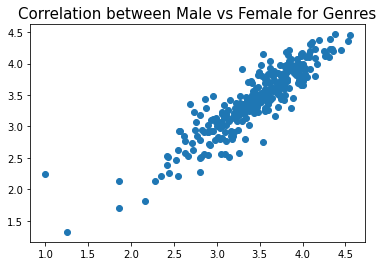

In [21]:
print("Correlation Coefficient = ", corr(mean_ratings_genres["F"],mean_ratings_genres["M"]))

plt.scatter(mean_ratings_genres["F"], mean_ratings_genres["M"])
plt.title("Correlation between Male vs Female for Genres",fontsize=15)
plt.show()

Text(0, 0.5, 'Rating')

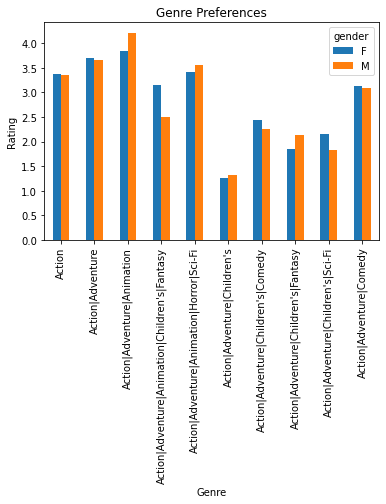

In [22]:
df_ratings_genres = mean_ratings_genres.head(10).reset_index()
ax1 = df_ratings_genres.plot.bar(x='genres', y=['F', 'M'] , title='Genre Preferences', legend='centre left')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Rating')

As we can see, there is positive correlation, Correlation Coefficient =  0.90, between male and female users genre choices. Now I would like to see top 10 movies for men and women. However, to do that, we should arrange our data set since some movies are rated way less than others. So we would like to chose movies which are rated more than 500 rates. Let's create another pivot table but this time we will use "ratings" and "title".

In [23]:
mean_ratings_titles = data.pivot_table(values='rating', index='title',columns='gender', aggfunc='mean')
mean_ratings_titles

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [24]:
rating_title = data.groupby('title').size()
rated_titles = rating_title.index[rating_title >= 500]

In [25]:
# To locate the movies which are rated more than 500 rates
mean_ratings_titles = mean_ratings_titles.loc[rated_titles]

In [26]:
top_female_titles = mean_ratings_titles.sort_values(by="F",ascending=False)
top_female_titles.head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944


In [27]:
top_male_titles = mean_ratings_titles.sort_values(by="M",ascending=False)
top_male_titles.head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Correlation Coefficient =  0.889911252608142


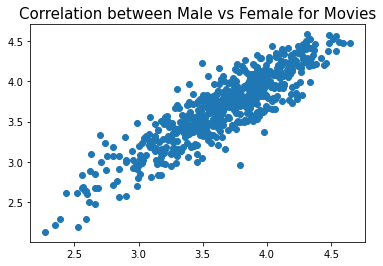

In [28]:
print("Correlation Coefficient = ", corr(mean_ratings_titles["F"],mean_ratings_titles["M"]))

plt.scatter(mean_ratings_titles["F"],mean_ratings_titles["M"])
plt.title("Correlation between Male vs Female for Movies",fontsize=15)
plt.show()

As we can see it has wider spectrum, Correlation Coefficient =  0.88, in movie analysis than the genre analysis. That mean women and men are like mostly the same genres but their movie choices are slightly different. Let's investigate which movies creates that difference most. First, I will check the movies liked by mostly women more than men. 

In [29]:
mean_ratings_titles['difference'] = mean_ratings_titles["M"] - mean_ratings_titles["F"]

In [30]:
sorted_difference = mean_ratings_titles.sort_values(by="difference")
sorted_difference.head(10)

gender,F,M,difference
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Grease (1978),3.975265,3.367041,-0.608224
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
Mary Poppins (1964),4.197740,3.730594,-0.467147
"Sound of Music, The (1965)",4.233677,3.783418,-0.450259
Never Been Kissed (1999),3.452174,3.002538,-0.449636
"Jewel of the Nile, The (1985)",3.494253,3.048096,-0.446157
Gone with the Wind (1939),4.269841,3.829371,-0.440471
Sense and Sensibility (1995),4.233333,3.819277,-0.414056


Text(0, 0.5, 'Rating')

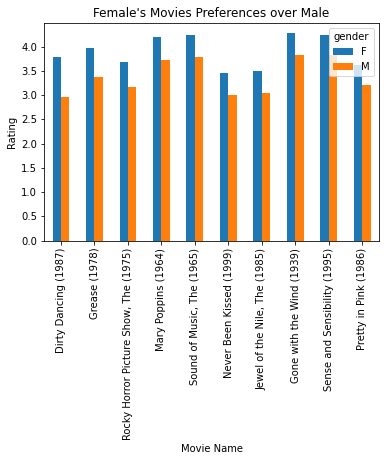

In [31]:
df_female_titles = sorted_difference.head(10).reset_index()
ax1 = df_female_titles.plot.bar(x='title', y=['F', 'M'] , title="Female's Movies Preferences over Male", legend='centre left')
ax1.set_xlabel('Movie Name')
ax1.set_ylabel('Rating')

So, Dirty Dancing, Grease and The Rocky Horror Picture Show are more liked by women than men. Now, lets check which movies liked by men more than women.

In [32]:
sorted_difference[::-1].head(10)

gender,F,M,difference
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
Big Trouble in Little China (1986),2.987952,3.485030,0.497078
From Dusk Till Dawn (1996),2.735714,3.232558,0.496844
"Me, Myself and Irene (2000)",2.629310,3.096847,0.467537


The Good, The Bad and The Ugly, Dumb&Dumber and Evil Dead II are the most three movies that are liked by men more than women.

Text(0, 0.5, 'Rating')

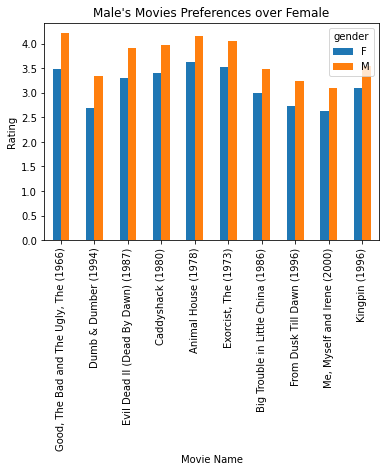

In [33]:
df_male_titles = sorted_difference[::-1].head(10).reset_index()
ax1 = df_male_titles.plot.bar(x='title', y=['F', 'M'] , title="Male's Movies Preferences over Female", legend='centre left')
ax1.set_xlabel('Movie Name')
ax1.set_ylabel('Rating')

Now, let's analize the users.

In [34]:
df_age = users.groupby('age').size()
df_age

age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

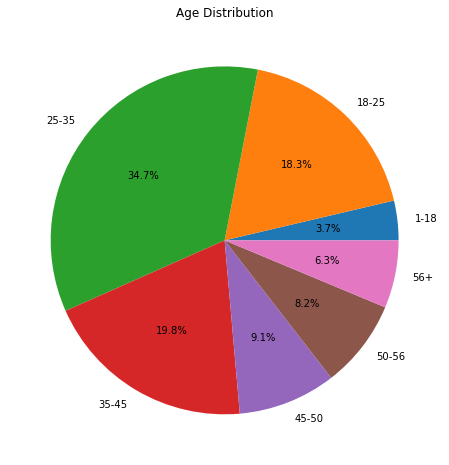

In [35]:
mylabels = ["1-18", "18-25","25-35","35-45","45-50","50-56","56+"]
plt.figure(facecolor='white',figsize=(8,8))
plt.pie(df_age, labels=mylabels, autopct='%.1f%%') 
plt.title("Age Distribution")
plt.show() 

The most users are belong to age group between 25-35 with %34.7 which is followed by 35-45 with %19.8 and 18-25 with %18,3.

In [36]:
mean_ratings_age = data.pivot_table(values='rating', index='genres',columns='age', aggfunc='mean')
mean_ratings_age

age,1,18,25,35,45,50,56
genres,,,,,,,
Action,3.393617,3.233253,3.282209,3.460765,3.442227,3.527273,3.566745
Action|Adventure,3.632035,3.636634,3.713771,3.642051,3.598513,3.734525,3.764706
Action|Adventure|Animation,4.636364,4.250000,4.059211,4.150000,3.846154,3.888889,3.800000
Action|Adventure|Animation|Children's|Fantasy,2.875000,2.588235,2.411765,2.814815,3.000000,3.333333,3.000000
Action|Adventure|Animation|Horror|Sci-Fi,3.600000,3.433962,3.620462,3.531034,3.125000,3.888889,3.250000
...,...,...,...,...,...,...,...
Sci-Fi|Thriller|War,3.666667,3.647059,3.269231,3.432432,3.350000,3.717391,3.454545
Sci-Fi|War,4.514286,4.471795,4.407950,4.474227,4.436242,4.530303,4.425287
Thriller,3.554156,3.393555,3.528716,3.608804,3.647098,3.744361,3.704969


<AxesSubplot:xlabel='age', ylabel='genres'>

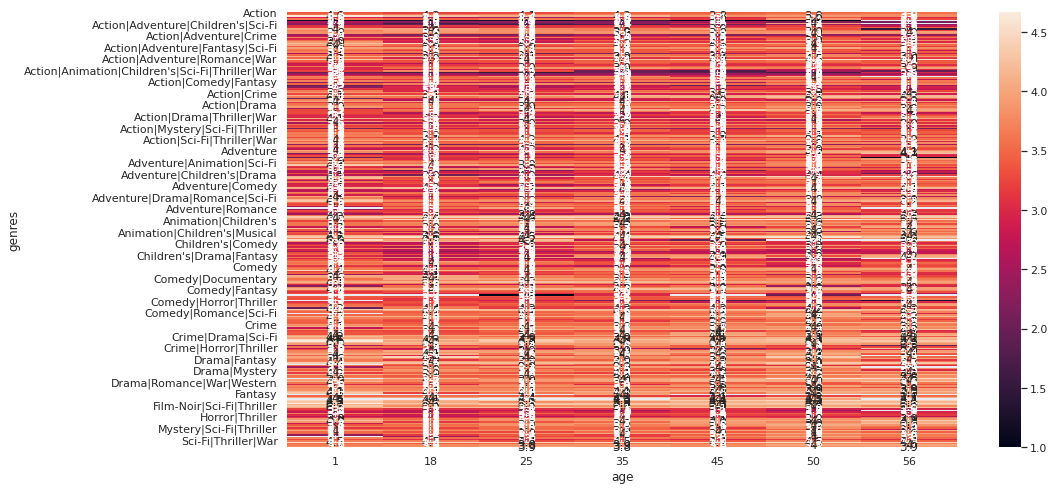

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(mean_ratings_age, annot=True)

The correlation between genres and ages are shown in the table above. This table stands for which genres are most liked between the ages and which ones are most hated. Now, let's find which users are tend to give high rates, and which ones are more likely to give low rates.

In [39]:
rating_users = data.groupby('user_id').size()
rated_users = rating_users.index[rating_users >= 250] # Usears at least give more than 250 rates
usersatt = ratings.groupby('user_id').agg({'rating': [np.mean, np.std]})
mean_ratings_users = usersatt.loc[rated_users]

In [40]:
hardusers = mean_ratings_users.sort_values([('rating', 'mean')], ascending=True)[:20]
easyusers = mean_ratings_users.sort_values([('rating', 'mean')], ascending=False)[:20]

In [41]:
easyusers.head(5)

rating          
             mean       std
user_id                    
4904     4.561881  0.629019
4086     4.487421  0.925369
161      4.471380  0.687747
3688     4.457237  0.851022
1586     4.424096  0.763540

In [42]:
hardusers.head(5)

rating          
             mean       std
user_id                    
5686     2.045283  0.939486
1340     2.162733  1.305214
163      2.182879  1.069522
1100     2.198819  1.287873
5039     2.202778  1.170907

In [ ]:
The most easyly

#### **CONCLUSION**

To sum up, in this data analysis, we have examined the MovieLens 1M data based on three components, genre, gender and users analysis. The data is mainly creates some misleading conclusions since the ratings are disturbed by year, gender and the age differences. However, it is still gives some good intuition about the movie choices. Further analysis can be used to examine which genres/movies are more profitable, which genres are more liked by different countries and which directors/castings/topics are more desirable by the users.